In [1]:
from textblob import TextBlob
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
albums = ["Taylor Swift", "Fearless (Taylor's Version)", "Speak Now (Taylor's Version)", 
          "Red (Taylor's Version)", "1989 (Taylor's Version)", "reputation", "Lover", 
          "folklore", "evermore", "Midnights", "The Tortured Poets Department"]

shortenings = ["Debut", "Fearless", "Speak Now", 
          "Red", "1989", "rep", "Lover", 
          "folklore", "evermore", "Midnights", "TTPD"]

In [3]:

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score <= -0.01:
        return -1
    elif score >= 0.01:
        return 1
    else:
        return 0

In [4]:
if __name__ == "__main__":

    sentiment_class = {}
    # Iterates over all of the directories
    for root, dirs, files in os.walk('songs_excl_ftv', topdown=True):

        for dir in dirs:
            sentiment_class[dir] = {}
            for file in os.listdir(os.path.join("songs_excl_ftv/", dir)):
                title = os.path.join(f"songs_excl_ftv/{dir}", file)
                with open(title) as t:
                    sentiment_class[dir][file[0:file.index(".")]] = {}
                    content = t.read()
                    sentiment = getPolarity(content)
                    sentiment = getAnalysis(sentiment)
                    sentiment_class[dir][file[0:file.index(".")]] = sentiment

    positives = []
    negatives = []
    neutrals = []
    for album in albums:
        pos_counts = 0
        neg_counts = 0
        neut_counts = 0
        for song in sentiment_class[album]:
            if sentiment_class[album][song] == 1:
                pos_counts += 1
            elif sentiment_class[album][song] == -1:
                neg_counts += 1
            else:
                neut_counts += 1
        positives.append(pos_counts)
        negatives.append(neg_counts)
        neutrals.append(neut_counts)
        


In [5]:
print(positives)
print(negatives)
print(neutrals)

[10, 13, 12, 18, 11, 7, 13, 10, 12, 16, 18]
[4, 6, 4, 2, 5, 6, 6, 7, 3, 4, 11]
[0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2]


In [6]:
num_of_songs = [14, 20, 16, 20, 17, 15, 19, 17, 17, 22, 31]

negatives = list(negatives)
neutrals = list(neutrals)
positives = list(positives)

for i, neg in enumerate(negatives):
    negatives[i] = neg / num_of_songs[i]

for i, pos in enumerate(positives):
    positives[i] = pos / num_of_songs[i]

for i, neu in enumerate(neutrals):
    neutrals[i] = neu / num_of_songs[i]

negatives = np.array(negatives)
positives = np.array(positives)
neutrals = np.array(neutrals)

In [7]:
print(negatives)
print(positives)
print(neutrals)

[0.28571429 0.3        0.25       0.1        0.29411765 0.4
 0.31578947 0.41176471 0.17647059 0.18181818 0.35483871]
[0.71428571 0.65       0.75       0.9        0.64705882 0.46666667
 0.68421053 0.58823529 0.70588235 0.72727273 0.58064516]
[0.         0.05       0.         0.         0.05882353 0.13333333
 0.         0.         0.11764706 0.09090909 0.06451613]


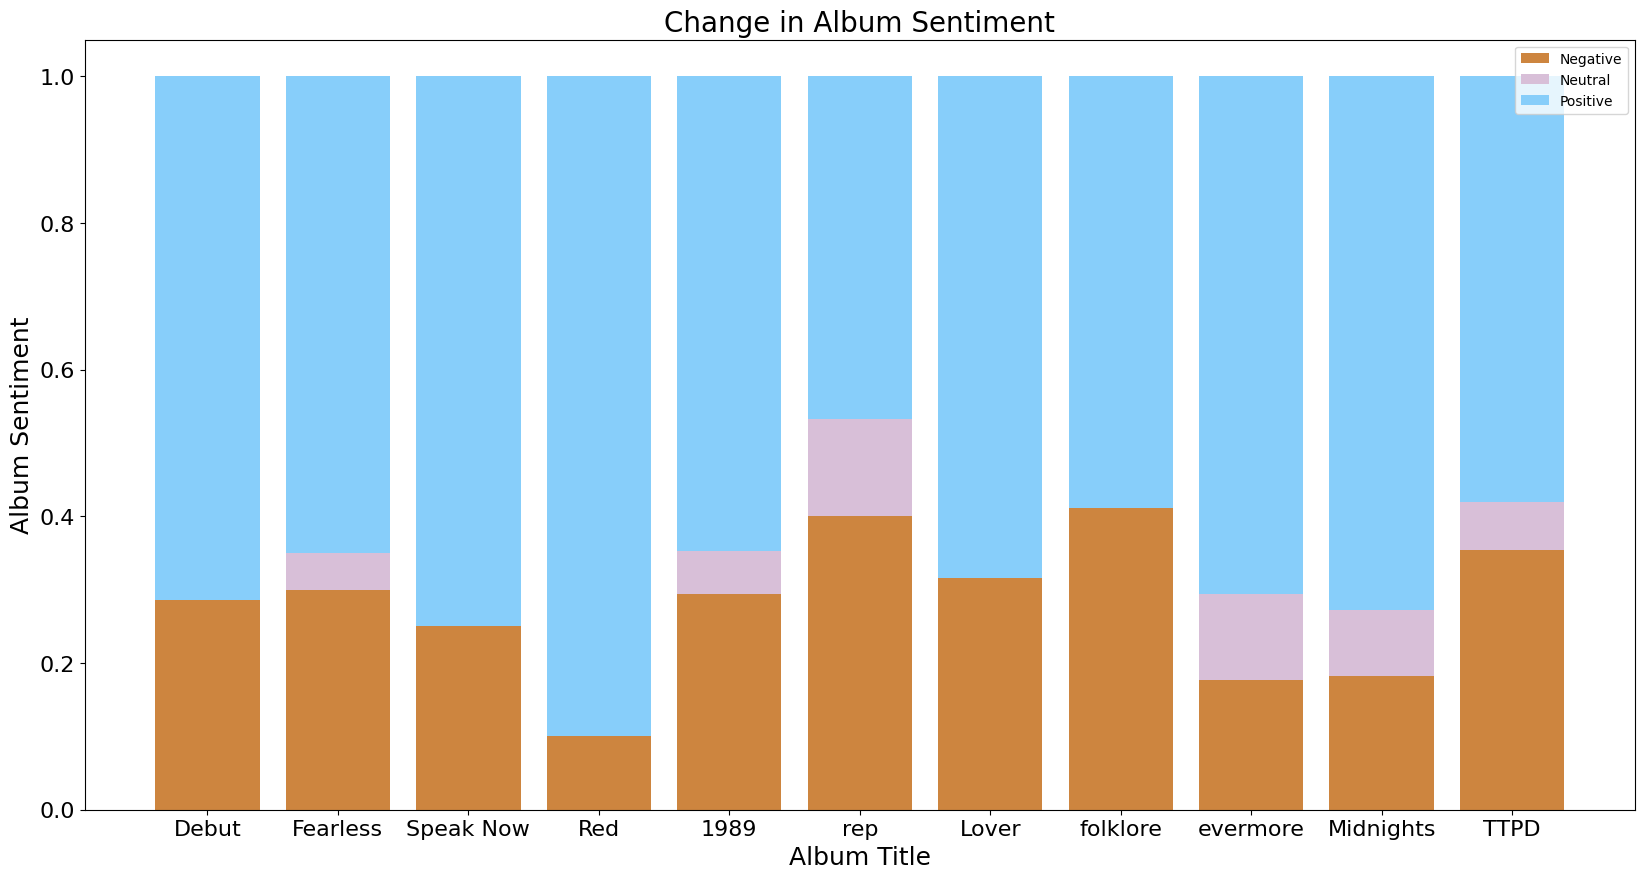

In [8]:
plt.figure(figsize=(20, 10))

plt.bar(shortenings, negatives, color='peru', label='Negative')
plt.bar(shortenings, neutrals, bottom = negatives, color = 'thistle', label = 'Neutral')
plt.bar(shortenings, positives, bottom = negatives + neutrals, color='lightskyblue', label="Positive")

plt.tick_params(axis="both", which='major', labelsize="16")

plt.title("Change in Album Sentiment", fontsize='20')
plt.xlabel("Album Title", fontsize='18')
plt.ylabel("Album Sentiment", fontsize='18')

plt.legend()
plt.show()